In [81]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.utils.data
from collections import OrderedDict
from PIL import Image
import scipy.io as scio
import os
import shutil

In [72]:
# Create train, valid and test directories to sort dataset into.
def makePartitionDirs():
    for i in range(1, 103):
        os.makedirs("data/102flowers/train/" + str(i), exist_ok=True)
        os.makedirs("data/102flowers/test/" + str(i), exist_ok=True)
        os.makedirs("data/102flowers/valid/" + str(i), exist_ok=True)


# Distribute dataset into train, valid and test directories according to setid.mat specifications.
def partitionData(imageLabels, setid, sortedPath, dataPath):
    for i in range(len(imageLabels["labels"][0])):
        filename = "image_" + str(i + 1).zfill(5) + ".jpg"
        if i + 1 in setid["trnid"][0]:
            targetFolder = os.path.join(
                sortedPath, "train", str(imageLabels["labels"][0][i])
            )
        elif i + 1 in setid["valid"][0]:
            targetFolder = os.path.join(
                sortedPath, "valid", str(imageLabels["labels"][0][i])
            )
        else:
            targetFolder = os.path.join(
                sortedPath, "test", str(imageLabels["labels"][0][i])
            )
        shutil.copy(
            os.path.join(dataPath, filename), os.path.join(targetFolder, filename)
        )

In [73]:
trainTransforms = transforms.Compose(
    [
        transforms.Resize(160),
        transforms.RandomRotation([-90, 180]),
        transforms.CenterCrop(128),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
testTransforms = validTransforms = transforms.Compose(
    [
        transforms.Resize(160),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

In [75]:
dataPath = "data/102flowers/jpg"
sortedPath = "data/102flowers"
setid = scio.loadmat(f"data/setid.mat")
imageLabels: dict = scio.loadmat(f"data/imagelabels.mat")
# Call these if you don't have the directories set up as needed.
makePartitionDirs()
partitionData(imageLabels, setid, sortedPath, dataPath)
trainingData = datasets.ImageFolder(
    root="data/102flowers/train", transform=trainTransforms
)
validationData = datasets.ImageFolder(
    root="data/102flowers/valid", transform=validTransforms
)
testingData = datasets.ImageFolder(
    root="data/102flowers/test", transform=testTransforms
)

In [76]:
# Data loaders for use as input.
trainDataLoader = torch.utils.data.DataLoader(trainingData, batch_size=16, shuffle=True)
validDataLoader = torch.utils.data.DataLoader(
    validationData, batch_size=16, shuffle=False
)
testDataLoader = torch.utils.data.DataLoader(testingData, batch_size=16, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dataset ImageFolder
    Number of datapoints: 1020
    Root location: data/102flowers/train
    StandardTransform
Transform: Compose(
               Resize(size=160, interpolation=bilinear, max_size=None, antialias=warn)
               RandomRotation(degrees=[-90.0, 180.0], interpolation=nearest, expand=False, fill=0)
               CenterCrop(size=(128, 128))
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


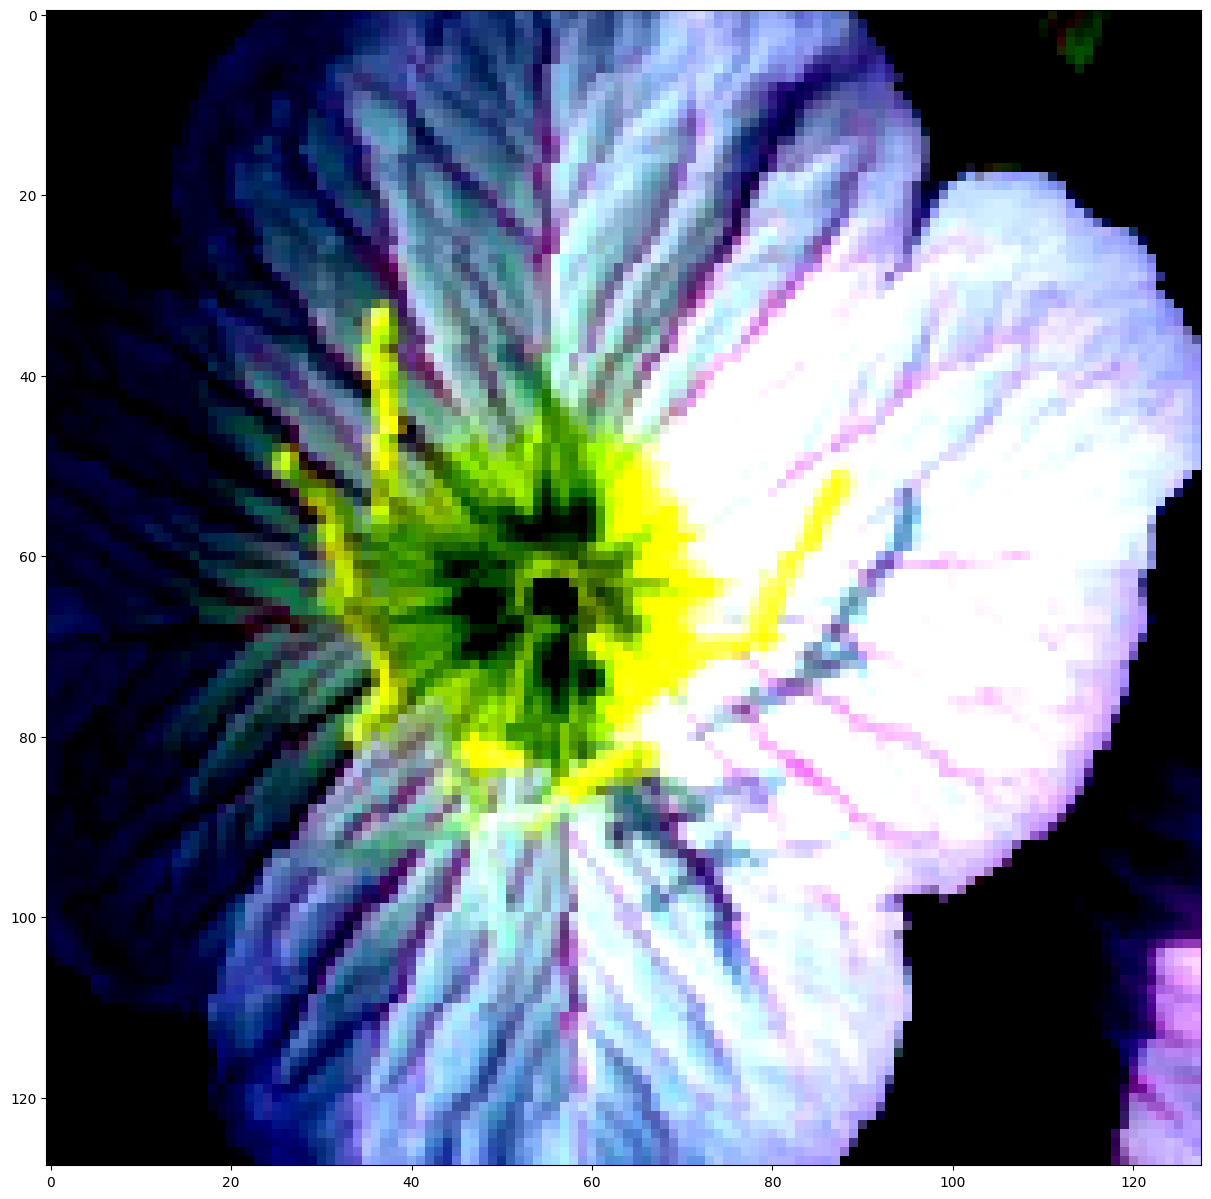

In [83]:
figure = plt.figure(figsize=(15, 15))
cols, rows = 10, 10
print(trainingData)
def showImage(image):
    npImage = image.numpy()
    plt.imshow(np.transpose(npImage, (1,2,0)))
    plt.show()
    
showImage(torchvision.utils.make_grid(trainingData[0]))
# for i in range(1, cols * rows + 1):
#     sample_idx = torch.randint(len(trainingData), size=(1,)).item()
#     img, label = trainingData[int(sample_idx)]
#     figure.add_subplot(rows, cols, i)
#     plt.title(label)
#     plt.axis("off")
#     processed_image = np.rollaxis(img.squeeze().numpy(), 0, 3)
#     # processed_image = img.squeeze()
#     # print(processed_image.shape)
#     plt.imshow(processed_image)
# plt.show()